In [32]:
from rdkit import Chem
from rdkit.Chem import BRICS
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw, BRICS, AllChem
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from rdkit.Chem import PandasTools
PandasTools.RenderImagesInAllDataFrames(images=True)
from rdkit.Chem import rdRGroupDecomposition
from rdkit.Chem.Scaffolds import MurckoScaffold
import re
from IPython.display import display
import numpy as np
from rdkit.Chem import RDConfig

number_of_free_bonds = 1  # The number of free bond(s) restricted. If 0, all fragments are saved

max_of_minFragmentSize = 10

# load molecules
data = {'smi': ['*c1ccc(cc1)N1C(=O)c2c(C1=O)c(c1ccccc1)c(c(c2c1ccccc1)c1ccc(cc1)c1c(c2ccccc2)c(c2ccccc2)c2c(c1c1ccccc1)C(=O)N(C2=O)*)c1ccccc1',
               '*c1ccc(cc1)c1sc(c(c1c1ccccc1)c1ccccc1)c1ccc(cc1)n1c(=O)c2c(c1=O)cc1c(c2)c(=O)n(c1=O)*',
               '*c1ccc(cc1)C(C(F)(F)F)(c1ccccc1)c1ccc(cc1)n1c(=O)c2c(c1=O)cc1c(c2)c(=O)n(c1=O)*',
               'CCCCCCCCCCOc1cc(sc1c1sc(cc1OCCCCCCCCCC)c1sc(c(c1)C=Cc1ccccc1)*)*',
               'CCCCCCCCCCCCCCCCCCN1C(=O)C(C(C1=O)*)C(c1ccccc1)C*',
               'CCCCCCCCCCCCCCCCN1C(=O)C(C(C1=O)C(c1ccccc1)C*)*']}

data = pd.DataFrame(data)
PandasTools.AddMoleculeColumnToFrame(frame=data, smilesCol='smi')
data.columns = ['smi', 'mol']
molecules = [molecule for molecule in data['mol'] if molecule is not None]
print('number of molecules :', len(molecules))

# generate fragments
fragments = set()
for i in range(1, max_of_minFragmentSize + 1):
    print(i, '/', max_of_minFragmentSize)
    for molecule in molecules:
        fragment = BRICS.BRICSDecompose(molecule, minFragmentSize=i)
        fragments.update(fragment)

# select and arange fragments
new_fragments = []
number_of_generated_structures = 0
for fragment in fragments:
    free_bond = []
    free_bond = [index for index, atom in enumerate(fragment) if atom == '*']
    flag = False
    if number_of_free_bonds == 0:
        if len(free_bond):
            flag = True
    else:
        if len(free_bond) == number_of_free_bonds:
            flag = True
    if flag:
        slip_index = []
        for i in range(len(free_bond)):
            if fragment[free_bond[i] - 2] == '[':
                slip_index.append(free_bond[i] - 2)
                slip_index.append(free_bond[i] - 1)
                slip_index.append(free_bond[i] + 1)
            else:
                slip_index.append(free_bond[i] - 3)
                slip_index.append(free_bond[i] - 2)
                slip_index.append(free_bond[i] - 1)
                slip_index.append(free_bond[i] + 1)
        new_fragment = ''
        for index, char_in_fragment in enumerate(fragment):
            if not index in slip_index:
                new_fragment += char_in_fragment
        new_fragments.append(new_fragment)
print('number of selected fragments :', len(new_fragments))

# delete duplications of fragments
new_fragments = list(set(new_fragments))
print('number of selected fragments without duplications :', len(new_fragments))

#print(fragments)

# save fragments
str_ = '\n'.join(new_fragments)
with open('generated_fragments1.smi', 'wt') as writer:
    writer.write(str_)
writer.close()

number of molecules : 6
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
number of selected fragments : 6
number of selected fragments without duplications : 6


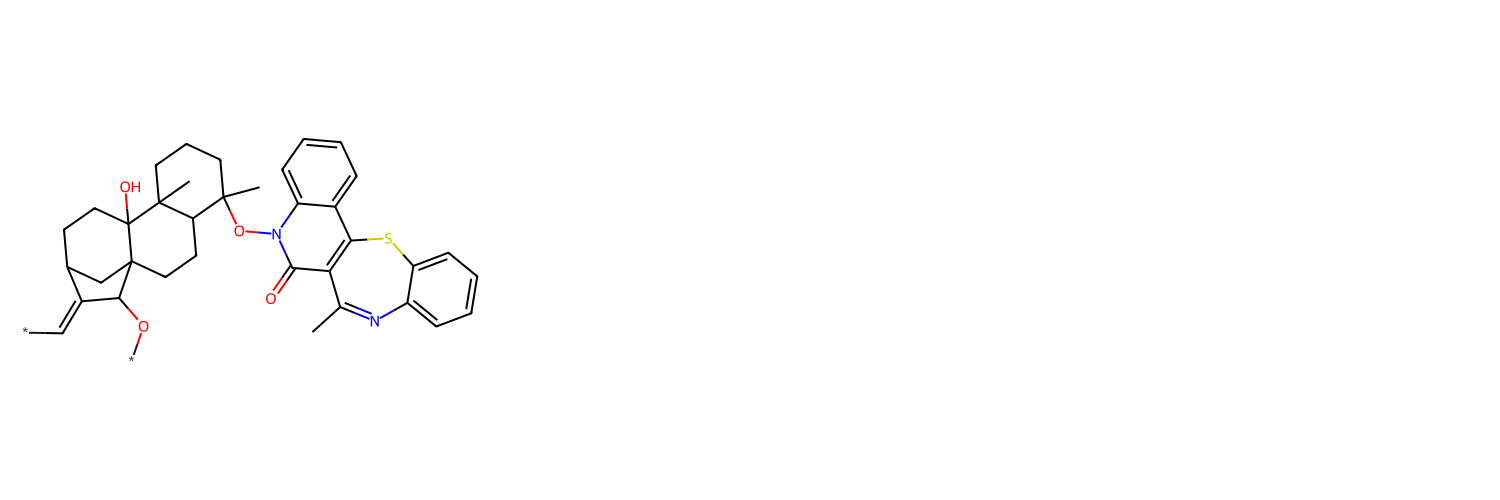

In [15]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

mol = Chem.MolFromSmiles('*C=C1C2CCC3(O)C4(C)CCCC(C)(On5c(=O)c6c(c7ccccc75)Sc5ccccc5N=C6C)C4CCC3(C2)C1O*')

smi = Chem.MolToSmiles(mol)

img1 = Draw.MolsToGridImage([mol], subImgSize=(500, 500))
display(img1)

In [12]:
# -*- coding: utf-8 -*-
"""
@author: Hiromasa Kaneko
"""

import numpy as np
from rdkit import Chem

number_of_structures = 1000  # 生成する化学構造の数

main_molecules = [molecule for molecule in Chem.SmilesMolSupplier('main-fragments-6.smi',
                                                                  delimiter='\t', titleLine=False)
                if molecule is not None]
fragment_molecules = [molecule for molecule in Chem.SmilesMolSupplier('sample_sub_fragments.smi',
                                                                      delimiter='\t', titleLine=False)
                     if molecule is not None]

bond_list = [Chem.rdchem.BondType.UNSPECIFIED, Chem.rdchem.BondType.SINGLE, Chem.rdchem.BondType.DOUBLE,
             Chem.rdchem.BondType.TRIPLE, Chem.rdchem.BondType.QUADRUPLE, Chem.rdchem.BondType.QUINTUPLE,
             Chem.rdchem.BondType.HEXTUPLE, Chem.rdchem.BondType.ONEANDAHALF, Chem.rdchem.BondType.TWOANDAHALF,
             Chem.rdchem.BondType.THREEANDAHALF, Chem.rdchem.BondType.FOURANDAHALF, Chem.rdchem.BondType.FIVEANDAHALF,
             Chem.rdchem.BondType.AROMATIC, Chem.rdchem.BondType.IONIC, Chem.rdchem.BondType.HYDROGEN,
             Chem.rdchem.BondType.THREECENTER, Chem.rdchem.BondType.DATIVEONE, Chem.rdchem.BondType.DATIVE,
             Chem.rdchem.BondType.DATIVEL, Chem.rdchem.BondType.DATIVER, Chem.rdchem.BondType.OTHER,
             Chem.rdchem.BondType.ZERO]

generated_structures = []
for generated_structure_number in range(number_of_structures):
    selected_main_molecule_number = np.floor(np.random.rand(1) * len(main_molecules)).astype(int)[0]
    main_molecule = main_molecules[selected_main_molecule_number]
    # make adjacency matrix and get atoms for main molecule
    main_adjacency_matrix = Chem.rdmolops.GetAdjacencyMatrix(main_molecule)
    for bond in main_molecule.GetBonds():
        main_adjacency_matrix[bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()] = bond_list.index(bond.GetBondType())
        main_adjacency_matrix[bond.GetEndAtomIdx(), bond.GetBeginAtomIdx()] = bond_list.index(bond.GetBondType())
    main_atoms = []
    for atom in main_molecule.GetAtoms():
        main_atoms.append(atom.GetSymbol())
    
    r_index_in_main_molecule_old = [index for index, atom in enumerate(main_atoms) if atom == '*']
    for index, r_index in enumerate(r_index_in_main_molecule_old):
        modified_index = r_index - index
        atom = main_atoms.pop(modified_index)
        main_atoms.append(atom)
        tmp = main_adjacency_matrix[:, modified_index:modified_index + 1].copy()
        main_adjacency_matrix = np.delete(main_adjacency_matrix, modified_index, 1)
        main_adjacency_matrix = np.c_[main_adjacency_matrix, tmp]
        tmp = main_adjacency_matrix[modified_index:modified_index + 1, :].copy()
        main_adjacency_matrix = np.delete(main_adjacency_matrix, modified_index, 0)
        main_adjacency_matrix = np.r_[main_adjacency_matrix, tmp]
    r_index_in_main_molecule_new = [index for index, atom in enumerate(main_atoms) if atom == '*']
    
    r_bonded_atom_index_in_main_molecule = []
    for number in r_index_in_main_molecule_new:
        r_bonded_atom_index_in_main_molecule.append(np.where(main_adjacency_matrix[number, :] != 0)[0][0])
    r_bond_number_in_main_molecule = main_adjacency_matrix[
        r_index_in_main_molecule_new, r_bonded_atom_index_in_main_molecule]
    
    main_adjacency_matrix = np.delete(main_adjacency_matrix, r_index_in_main_molecule_new, 0)
    main_adjacency_matrix = np.delete(main_adjacency_matrix, r_index_in_main_molecule_new, 1)
    
    for i in range(len(r_index_in_main_molecule_new)):
        main_atoms.remove('*')
    main_size = main_adjacency_matrix.shape[0]
    
    selected_fragment_numbers = np.floor(np.random.rand(len(r_index_in_main_molecule_old)) * len(fragment_molecules)).astype(int)
      
    generated_molecule_atoms = main_atoms[:]
    generated_adjacency_matrix = main_adjacency_matrix.copy()
    for r_number_in_molecule in range(len(r_index_in_main_molecule_new)):
        fragment_molecule = fragment_molecules[selected_fragment_numbers[r_number_in_molecule]]
        fragment_adjacency_matrix = Chem.rdmolops.GetAdjacencyMatrix(fragment_molecule)
        for bond in fragment_molecule.GetBonds():
            fragment_adjacency_matrix[bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()] = bond_list.index(
                bond.GetBondType())
            fragment_adjacency_matrix[bond.GetEndAtomIdx(), bond.GetBeginAtomIdx()] = bond_list.index(
                bond.GetBondType())
        fragment_atoms = []
        for atom in fragment_molecule.GetAtoms():
            fragment_atoms.append(atom.GetSymbol())

        # integrate adjacency matrix
        r_index_in_fragment_molecule = fragment_atoms.index('*')

        r_bonded_atom_index_in_fragment_molecule = \
            np.where(fragment_adjacency_matrix[r_index_in_fragment_molecule, :] != 0)[0][0]
        if r_bonded_atom_index_in_fragment_molecule > r_index_in_fragment_molecule:
            r_bonded_atom_index_in_fragment_molecule -= 1

        fragment_atoms.remove('*')
        fragment_adjacency_matrix = np.delete(fragment_adjacency_matrix, r_index_in_fragment_molecule, 0)
        fragment_adjacency_matrix = np.delete(fragment_adjacency_matrix, r_index_in_fragment_molecule, 1)

        main_size = generated_adjacency_matrix.shape[0]
        generated_adjacency_matrix = np.c_[generated_adjacency_matrix, np.zeros(
            [generated_adjacency_matrix.shape[0], fragment_adjacency_matrix.shape[0]], dtype='int32')]
        generated_adjacency_matrix = np.r_[generated_adjacency_matrix, np.zeros(
            [fragment_adjacency_matrix.shape[0], generated_adjacency_matrix.shape[1]], dtype='int32')]

        generated_adjacency_matrix[r_bonded_atom_index_in_main_molecule[
                                       r_number_in_molecule], r_bonded_atom_index_in_fragment_molecule + main_size] = \
            r_bond_number_in_main_molecule[r_number_in_molecule]
        generated_adjacency_matrix[
            r_bonded_atom_index_in_fragment_molecule + main_size, r_bonded_atom_index_in_main_molecule[
                r_number_in_molecule]] = r_bond_number_in_main_molecule[r_number_in_molecule]
        generated_adjacency_matrix[main_size:, main_size:] = fragment_adjacency_matrix

        # integrate atoms
        generated_molecule_atoms += fragment_atoms

    # generate structures 
    generated_molecule = Chem.RWMol()
    atom_index = []
    for atom_number in range(len(generated_molecule_atoms)):
        atom = Chem.Atom(generated_molecule_atoms[atom_number])
        molecular_index = generated_molecule.AddAtom(atom)
        atom_index.append(molecular_index)
    for index_x, row_vector in enumerate(generated_adjacency_matrix):
        for index_y, bond in enumerate(row_vector):
            if index_y <= index_x:
                continue
            if bond == 0:
                continue
            else:
                generated_molecule.AddBond(atom_index[index_x], atom_index[index_y], bond_list[bond])

    generated_molecule = generated_molecule.GetMol()
    generated_structures.append(Chem.MolToSmiles(generated_molecule))
    if (generated_structure_number + 1) % 1000 == 0 or (generated_structure_number + 1) == number_of_structures:
        print(generated_structure_number + 1, '/', number_of_structures)
str_ = '\n'.join(generated_structures)
with open('molecule-6.smi', 'wt') as writer:
    writer.write(str_)
writer.close()

[16:04:01] WARNING: no name column found on line 0
[16:04:01] WARNING: no name column found on line 1
[16:04:01] WARNING: no name column found on line 2
[16:04:01] WARNING: no name column found on line 3
[16:04:01] WARNING: no name column found on line 4
[16:04:01] WARNING: no name column found on line 5
[16:04:01] WARNING: no name column found on line 6
[16:04:01] WARNING: no name column found on line 7
[16:04:01] WARNING: no name column found on line 8
[16:04:01] WARNING: no name column found on line 9
[16:04:01] WARNING: no name column found on line 10
[16:04:01] WARNING: no name column found on line 11
[16:04:01] WARNING: no name column found on line 12
[16:04:01] WARNING: no name column found on line 13
[16:04:01] WARNING: no name column found on line 14
[16:04:01] WARNING: no name column found on line 15
[16:04:01] WARNING: no name column found on line 16
[16:04:01] WARNING: no name column found on line 0
[16:04:01] WARNING: no name column found on line 1
[16:04:01] WARNING: no n

1000 / 1000
